In [2]:
import nilmtk
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('ggplot')

In [3]:
from nilmtk import DataSet
# ds = DataSet('ukdale.h5')
dataset = nilmtk.DataSet('C:/Users/Lenovo/Documents/data/ukdale.h5/ukdale.h5')
nilmtk.utils.print_dict(dataset.metadata)

In [4]:
nilmtk.utils.print_dict(dataset.buildings)
elec = dataset.buildings[2].elec

In [5]:
elec_mains = elec.mains()
elec_mains.power_series_all_data().head(10)

2013-04-16 21:45:16.300000+01:00    0.0
2013-04-16 21:45:17.300000+01:00    0.0
2013-04-16 21:45:18.300000+01:00    0.0
2013-04-16 21:45:19.300000+01:00    0.0
2013-04-16 21:45:20.300000+01:00    0.0
2013-04-16 21:45:21.300000+01:00    0.0
2013-04-16 21:45:22.300000+01:00    0.0
2013-04-16 21:45:23.300000+01:00    0.0
2013-04-16 21:45:24.400000+01:00    0.0
2013-04-16 21:45:25.300000+01:00    0.0
Name: (power, active), dtype: float32

In [6]:
elec.mains().total_energy()

active      1008.974375
apparent    1125.512251
dtype: float64

In [7]:
energy_per_meter = elec.submeters().energy_per_meter()
from pandas import DataFrame
energy_per_meter=energy_per_meter.T
energy_per_meter.head()

18/18 ElecMeter(instance=19, building=2, dataset='UK-DALE', appliances=[Appliance(type='cooker', instance=1)])ce=1)])]))

,active,apparent,reactive
"(2, 2, UK-DALE)",45.915003,NaN,NaN
"(3, 2, UK-DALE)",109.253930,NaN,NaN
"(4, 2, UK-DALE)",28.383643,NaN,NaN
"(5, 2, UK-DALE)",84.936261,NaN,NaN
"(6, 2, UK-DALE)",47.749266,NaN,NaN


In [8]:
# kettle = dataset.buildings[2].elec['kettle']
# dishwasher = dataset.buildings[2].elec['dish washer']
# fridge = dataset.buildings[2].elec['fridge']
# microwave = dataset.buildings[2].elec['microwave']
# washing_machine = dataset.buildings[2].elec['washing machine']
# df1 = next(kettle.load()).dropna()

# df2 = next(dishwasher.load()).dropna()
# df3 = next(fridge.load()).dropna()
# df4 = next(microwave.load()).dropna()
# df5 = next(washing_machine.load()).dropna()

In [9]:
# print(df3.index.min(),df3.index.max())

In [10]:
# start='2013-06-17 16:00:22+00:00'
# end  ='2013-06-17 17:00:22+00:00'
# df3.loc[start:end].plot()

In [11]:
top_7 = elec.submeters().select_top_k(10)
top_7.appliances

18/18 ElecMeter(instance=19, building=2, dataset='UK-DALE', appliances=[Appliance(type='cooker', instance=1)])ce=1)])]))

[Appliance(type='computer monitor', instance=1),
 Appliance(type='modem', instance=1),
 Appliance(type='kettle', instance=1),
 Appliance(type='dish washer', instance=1),
 Appliance(type='broadband router', instance=1),
 Appliance(type='computer', instance=1),
 Appliance(type='laptop computer', instance=1),
 Appliance(type='washing machine', instance=1),
 Appliance(type='active speaker', instance=1),
 Appliance(type='fridge', instance=1)]

In [12]:
from pandas import DataFrame
app=dataset.buildings[2].elec.appliances
app=DataFrame(app,columns=['appliance'])
app

,appliance
0,"Appliance(type='toaster', instance=1)"
1,"Appliance(type='computer monitor', instance=1)"
2,"Appliance(type='external hard disk', instance=1)"
3,"Appliance(type='rice cooker', instance=1)"
4,"Appliance(type='games console', instance=1)"
5,"Appliance(type='modem', instance=1)"
6,"Appliance(type='laptop computer', instance=2)"
7,"Appliance(type='kettle', instance=1)"
8,"Appliance(type='cooker', instance=1)"
9,"Appliance(type='broadband router', instance=1)"


In [13]:
def rename(col):
    if isinstance(col, tuple):
        col = '_'.join(str(c) for c in col)
             
        
            
    return col


In [14]:
# !pip install --upgrade pandas

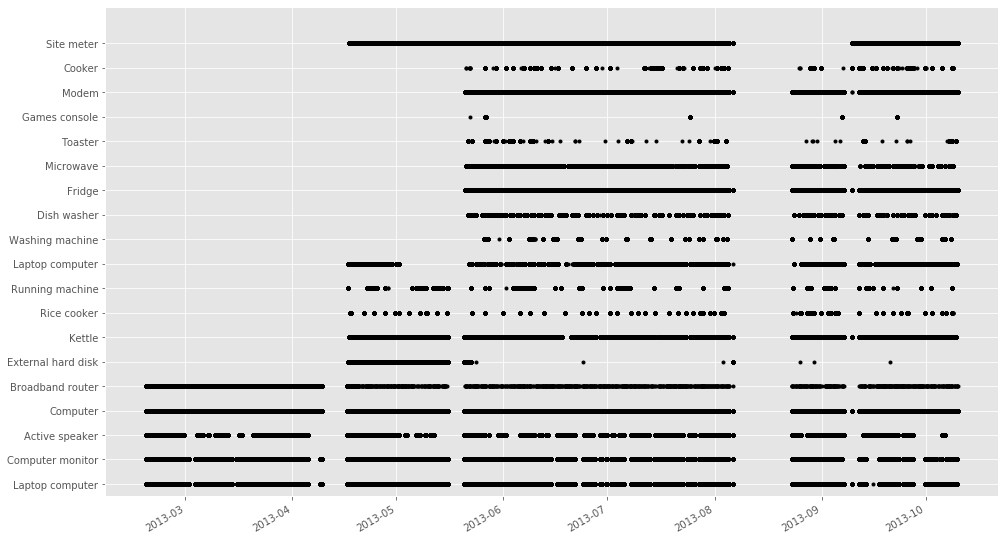

In [15]:
elec.plot_when_on(on_power_threshold = 10)

In [16]:
df = next(dataset.buildings[2].elec.load(physical_quantity=['power','voltage'],sample_period=120)) 

df.columns = map(rename, df.columns)
df.head()


Loading data for meter ElecMeterID(instance=20, building=2, dataset='UK-DALE')     
Done loading data all meters for this chunk.


,power_apparent,voltage_,power_active
2013-02-17 15:38:00+00:00,NaN,NaN,100.285721
2013-02-17 15:40:00+00:00,NaN,NaN,101.500000
2013-02-17 15:42:00+00:00,NaN,NaN,106.449997
2013-02-17 15:44:00+00:00,NaN,NaN,110.850006
2013-02-17 15:46:00+00:00,NaN,NaN,107.250000


In [17]:
# %history -g 

In [18]:
df=df.rename(columns={"voltage_": "voltage"}, errors="raise")
df.tail()

,power_apparent,voltage,power_active
2013-10-10 06:08:00+01:00,145.866837,244.062256,157.842667
2013-10-10 06:10:00+01:00,144.775253,243.298248,157.129364
2013-10-10 06:12:00+01:00,145.122086,243.362503,157.281097
2013-10-10 06:14:00+01:00,146.259506,243.301834,157.743683
2013-10-10 06:16:00+01:00,NaN,NaN,NaN


In [19]:
cutoff_st = '2013-06-16 23:54:00+00:00'
cutoff_et = '2013-09-30 23:59:59+00:00'
df = df.loc[cutoff_st:cutoff_et]
df.head(1)


,power_apparent,voltage,power_active
2013-06-17 00:54:00+01:00,165.105911,242.083832,211.452332


In [20]:
import datetime
df.index= df.index.tz_localize(None)
df.head(1)

,power_apparent,voltage,power_active
2013-06-17 00:54:00,165.105911,242.083832,211.452332


In [21]:
# !pip install gcsfs

In [22]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import gcsfs
import sklearn.metrics

%matplotlib inline

In [23]:
def load_main_energy_data(path):
  """Load main energy data from the specified file.
  
  Load main energy data from the specified file.
  
  Args:
    path - string. Path to the data file.
  Returns:
    pd.DataFrame - Main energy data in the household.
  Raises:
    ValueError. Raised when the specified file does not exist.
  """
  
  if not os.path.exists(path):
    raise ValueError('File {} does not exist.'.format(path))
  
  with open(path, 'r') as f:
    data = pd.read_csv(f,
                       delimiter=' ',
                       header=None,
                       names=['time',
                              'main_watts',
                              'main_va',
                              'main_RMS'])
  
  data.time = data.time.apply(lambda x: datetime.fromtimestamp(x))
  data.set_index('time', drop=True, inplace=True)
  data.index = data.index.floor('S')
  return data

In [24]:
def load_appliance_energy_data(path, appliance_name):
  """Load appliance energy data from file.
  
  Load energy data from the specified file.
  
  Args:
    path - string. Path to the data file.
    appliance_name - string. Name of the appliance.
  Returns:
    pd.DataFrame. A 2-column dataframe.
    The 1st column is timestamp in UTC, and the 2nd is energy in 
  Raises:
    ValueError. Raised when the specified file does not exist.
  """
  
  if not os.path.exists(path):
    raise ValueError('File {} does not exist.'.format(path))
  
  with open(path, 'r') as f:
    df = pd.read_csv(f,
                     delimiter=' ',
                     header=None,
                     names=['time', appliance_name])
  
  df.time = df.time.apply(lambda x: datetime.fromtimestamp(x))
  df.set_index('time', drop=True, inplace=True)
  df.index = df.index.floor('S')
  return df

In [25]:
def load_energy_data(data_dir, house_id, load_main=False):
  """Load all appliances energy data.
  
  Load all appliances energy data collected in a specified household.
  
  Args:
    data_dir - string. Path to the directory of data.
    house_id - int. Household id.
    load_main - bool. Whether to load mains.dat.
  Returns:
    pd.DataFrame - Energy data in the household.
  Raises:
    ValueError. Raised when the specified directory or household does not exist.
  """
  
  house_data_dir = os.path.join(data_dir, 'house_{}'.format(house_id))
  if not os.path.exists(house_data_dir):
    raise ValueError('{} does not exist.'.format(house_data_dir))
  
  if load_main:
    main_file = os.path.join(house_data_dir, 'mains.dat')
    data = load_main_energy_data(main_file)
  
  label_file = os.path.join(house_data_dir, 'labels.dat')
  with open(label_file, 'r') as f:
    labels = pd.read_csv(f,
                         delimiter=' ',
                         header=None,
                         index_col=0,
                         names=['appliance'])
  
  appliance_files = filter(lambda x: re.match(r'channel_\d+\.dat', x),
                           os.listdir(house_data_dir))

  ll = [data,] if load_main else []
  for f in appliance_files:
    appliance_id = int(f.split('.')[0].split('_')[1])
    appliance_name = labels.loc[appliance_id, 'appliance']
    ll.append(load_appliance_energy_data(os.path.join(house_data_dir, f),
                                         appliance_name))
  if load_main:  
    data = pd.concat(ll, axis=1, join_axes=[data.index])
  else:
    data = pd.concat(ll, axis=1)
  return data

In [26]:
use_raw = False #@param

selected_hid = 2 #@param
raw_data_dir = 'C:/Users/Lenovo/Documents/ukdale' #@param
selected_house_dir = os.path.join(raw_data_dir, 'house_{}'.format(selected_hid))

In [27]:
%%time
energy_data = load_energy_data(raw_data_dir, selected_hid)

Wall time: 1min 43s


In [28]:
energy_data.head(3)

,aggregate,running_machine,laptop2,washing_machine,dish_washer,fridge,microwave,toaster,playstation,modem,cooker,laptop,monitor,speakers,server,router,server_hdd,kettle,rice_cooker
time,,,,,,,,,,,,,,,,,,,
2013-02-17 21:09:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,62.0,3.0,21.0,NaN,NaN,NaN,NaN
2013-02-17 21:09:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,61.0,3.0,21.0,NaN,NaN,NaN,NaN
2013-02-17 21:09:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,62.0,3.0,21.0,NaN,NaN,NaN,NaN


In [29]:
energy_data.index.min(), energy_data.index.max()

(Timestamp('2013-02-17 21:09:19'), Timestamp('2013-10-10 10:45:58'))

In [30]:
cutoff_st = '2013-06-17 00:00:00'
cutoff_et = '2013-09-30 23:59:59'
energy_data = energy_data.loc[cutoff_st:cutoff_et]
print('{}, {}'.format(energy_data.index.min(), energy_data.index.max()))

2013-06-17 00:00:00, 2013-09-30 23:59:59


In [31]:
energy_data = energy_data.fillna(method='ffill').fillna(method='bfill')


In [32]:
energy_data = energy_data.asfreq(freq='1S', method='ffill')
print(energy_data.shape)

(9158400, 19)


In [33]:
if 'aggregate' in energy_data.columns:
  energy_data = energy_data.drop('aggregate', axis=1)

energy_data['gross'] = energy_data.sum(axis=1)

In [34]:
# st = '2013-07-04 00:00:00'
# et = '2013-07-04 01:00:00'
# sub_df = energy_data.loc[st:et]
# print(sub_df.shape)

In [35]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# ax = sub_df[['gross']].plot(ax=ax)
# ax.grid(True)
# ax.set_title('House {}'.format(selected_hid))
# ax.set_ylabel('Power consumption in watts')
# plt.savefig("power consumption pattern in watts for an hour in selected house.png")

In [36]:
energy_data = energy_data.astype(int)


In [37]:
appliance_cols = ['running_machine', 'laptop2', 'washing_machine',
       'dish_washer', 'fridge', 'microwave', 'toaster', 'playstation', 'modem',
       'cooker', 'laptop', 'monitor', 'speakers', 'server', 'router',
       'server_hdd', 'kettle', 'rice_cooker']
print(appliance_cols)

['running_machine', 'laptop2', 'washing_machine', 'dish_washer', 'fridge', 'microwave', 'toaster', 'playstation', 'modem', 'cooker', 'laptop', 'monitor', 'speakers', 'server', 'router', 'server_hdd', 'kettle', 'rice_cooker']


In [38]:
# nrow = int(np.ceil(np.sqrt(len(appliance_cols))))
# ncol = int(np.ceil(1.0 * len(appliance_cols) / nrow))

# fig, axes = plt.subplots(nrow, ncol, figsize=(6*ncol, 4*nrow))
# axes[-1, -1].axis('off')

# for i, app in enumerate(appliance_cols):
#   row_ix = i // 4
#   col_ix = i % 4
#   ax = axes[row_ix][col_ix]
#   lb = energy_data[app].std()
#   ub = energy_data[app].max() - lb
# #   energy_data[app + '_on'] = energy_data[app].apply(
# #       lambda x: 1 if x > lb else 0)
#   energy_data[app][(energy_data[app] > lb) & 
#                    (energy_data[app] < ub)].plot.hist(bins=20, ax=ax)
#   ax.set_title(app)
#   ax.grid(True)

# plt.tight_layout()
# plt.savefig("power consumption histograms of appliances of selected house.png")

In [39]:
result = pd.concat([energy_data,df], axis=1, join='inner')
result.head(3)

,running_machine,laptop2,washing_machine,dish_washer,fridge,microwave,toaster,playstation,modem,cooker,...,speakers,server,router,server_hdd,kettle,rice_cooker,gross,power_apparent,voltage,power_active
2013-06-17 00:54:00,1,0,1,0,10,0,0,1,9,0,...,10,13,6,1,1,1,137,165.105911,242.083832,211.452332
2013-06-17 00:56:00,1,0,1,1,11,0,0,1,9,0,...,10,13,6,1,1,1,137,146.013412,241.960007,148.721054
2013-06-17 00:58:00,1,0,1,1,100,0,0,1,9,0,...,11,13,6,1,1,1,228,145.492081,241.790497,148.599487


In [40]:
result['mean'] = energy_data['gross'].resample('120s').mean()
result['min_power']= energy_data['gross'].resample('120s').min()
result['max_power']= energy_data['gross'].resample('120s').max()
result['std']= energy_data['gross'].resample('120s').std()
result['variance']= energy_data['gross'].resample('120s').var()
part1=energy_data['gross']
result['skew'] = part1.groupby(pd.Grouper(freq='120s')).skew()
result['kurtosis']=part1.groupby(pd.Grouper(freq='120s')).apply(pd.Series.kurt)


In [41]:
result.head(3)

,running_machine,laptop2,washing_machine,dish_washer,fridge,microwave,toaster,playstation,modem,cooker,...,power_apparent,voltage,power_active,mean,min_power,max_power,std,variance,skew,kurtosis
2013-06-17 00:54:00,1,0,1,0,10,0,0,1,9,0,...,165.105911,242.083832,211.452332,138.875000,134,155,4.893079,23.942227,1.761929,2.630482
2013-06-17 00:56:00,1,0,1,1,11,0,0,1,9,0,...,146.013412,241.960007,148.721054,184.533333,137,246,43.648122,1905.158543,-0.011993,-1.933220
2013-06-17 00:58:00,1,0,1,1,100,0,0,1,9,0,...,145.492081,241.790497,148.599487,224.958333,221,245,4.676772,21.872199,3.003258,9.809303


In [42]:
result=result.astype(float)

In [43]:
result=result.dropna(how='all')

In [44]:
y=result.drop(['mean','gross','min_power','max_power','std','skew','kurtosis','voltage','power_apparent','power_active','variance'],axis=1)
y.head(2)

,running_machine,laptop2,washing_machine,dish_washer,fridge,microwave,toaster,playstation,modem,cooker,laptop,monitor,speakers,server,router,server_hdd,kettle,rice_cooker
2013-06-17 00:54:00,1.0,0.0,1.0,0.0,10.0,0.0,0.0,1.0,9.0,0.0,22.0,61.0,10.0,13.0,6.0,1.0,1.0,1.0
2013-06-17 00:56:00,1.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,9.0,0.0,20.0,61.0,10.0,13.0,6.0,1.0,1.0,1.0


In [45]:
for i, app in enumerate(appliance_cols):
  lb = y[app].std()
  ub = y[app].max() - lb
  y[app + '_on'] = y[app].apply( lambda x: 1 if x > lb else 0)
  y=y.drop([app],axis=1)

In [46]:
y.head(3)

,running_machine_on,laptop2_on,washing_machine_on,dish_washer_on,fridge_on,microwave_on,toaster_on,playstation_on,modem_on,cooker_on,laptop_on,monitor_on,speakers_on,server_on,router_on,server_hdd_on,kettle_on,rice_cooker_on
2013-06-17 00:54:00,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0,0
2013-06-17 00:56:00,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0,0
2013-06-17 00:58:00,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0


In [47]:
y.isin([1]).sum(axis=0)

running_machine_on      246
laptop2_on            12171
washing_machine_on      561
dish_washer_on         1145
fridge_on             43888
microwave_on            293
toaster_on               11
playstation_on        73744
modem_on              76285
cooker_on              1173
laptop_on             38507
monitor_on            33820
speakers_on           45173
server_on             76293
router_on             76282
server_hdd_on         12258
kettle_on              1216
rice_cooker_on          642
dtype: int64

In [48]:
X=result[['gross','mean','min_power','max_power','std','variance','skew','kurtosis','voltage','power_apparent','power_active']]
X.head(1)

,gross,mean,min_power,max_power,std,variance,skew,kurtosis,voltage,power_apparent,power_active
2013-06-17 00:54:00,137.0,138.875,134.0,155.0,4.893079,23.942227,1.761929,2.630482,242.083832,165.105911,211.452332


In [49]:
X=X.astype('float')

In [50]:
# X=X.astype(int)
# X[X < 0] = 0

In [51]:
# !pip install seaborn

In [52]:
# import seaborn as sns
# corr=X.corr()

In [53]:
# fig, ax = plt.subplots(figsize=(11,11))
# fig1=sns.heatmap(corr,annot = True,fmt='.1g',ax=ax)
# fig1 = fig1.get_figure()    
# fig1.savefig('correlation matrix of input features.png', dpi=400)


In [54]:
# plt.style.use('ggplot')

# fig, ax = plt.subplots(figsize=(8, 10))
# for col in y:
#      ax.plot(X.corrwith(y[col]),label=col)
#      leg = ax.legend()
# plt.xlabel('Input features')
# plt.ylabel('correlation coefficient of input features with appliance ON/OFF status')

In [55]:
# corr_ana=result.corr()

In [56]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.heatmap(corr_ana,annot = True,fmt='.1g',ax=ax)

In [57]:
# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.savefig('graph of feature importances.png',dpi=400)
# plt.show()

In [58]:
X=X[['gross','mean','min_power','max_power','power_active','std','voltage']]

In [59]:
y=y[['washing_machine_on','dish_washer_on', 'fridge_on', 'microwave_on', 'cooker_on', 'laptop_on', 'monitor_on', 'kettle_on',
       'rice_cooker_on']]

In [60]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.21802109, -0.22487677, -0.18497173, -0.23523845, -0.40613593,
        -0.15057041,  1.03915445],
       [-0.21802109, -0.12212384, -0.17733419, -0.0703674 , -0.47979557,
         0.11726556,  0.96588904],
       [-0.02337358, -0.0311484 ,  0.03651713, -0.07217917, -0.47993832,
        -0.15206531,  0.86559261],
       [-0.03834647, -0.03714967,  0.02887958, -0.10479103, -0.47591012,
        -0.16695815,  0.71856522],
       [-0.02979053, -0.0351805 ,  0.01869619, -0.08123802, -0.47607691,
        -0.13638568,  0.69361074]])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [62]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (61034, 7) (61034, 9)
Test set: (15259, 7) (15259, 9)


In [63]:
import numpy as np
y=y.to_numpy()
y=y.astype(int)

In [64]:
# !pip install scikit-multilearn

In [65]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
# 
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = range(1,20,1)
# Minimum number of samples required to split a node
min_samples_split = range(1,10,1)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,10,1)
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [66]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'oob_score': bootstrap
             }

In [67]:
# !pip install xgboost

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=None,random_state=27,verbose=1)

In [69]:
from xgboost import XGBClassifier

In [70]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, cv = 3,n_jobs=4)

In [71]:
rf_RandomGrid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   17.1s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(random_state=27, verbose=1),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(1, 20),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': [50, 61, 72, 83, 94,
                                                         105, 116, 127, 138,
                                                         150],
                                        'oob_score': [True, False]})

In [72]:
rfc1=rf_RandomGrid.best_estimator_

In [73]:

print (f'Test Accuracy - : {rfc1.score(X_test,y_test):.3f}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test Accuracy - : 0.907


[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    0.8s finished


In [74]:
print (f'Train Accuracy - : {rfc1.score(X_train,y_train):.3f}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Accuracy - : 0.937


[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    3.6s finished


In [75]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [76]:
getTrainScores(rf_RandomGrid)

({0: "mean:0.8774453689970696params{'oob_score': False, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': False}",
  1: "mean:0.8997607884776696params{'oob_score': False, 'n_estimators': 61, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': False}",
  2: "mean:0.8847036099108442params{'oob_score': False, 'n_estimators': 127, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': False}",
  3: "mean:nanparams{'oob_score': True, 'n_estimators': 94, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}",
  4: "mean:nanparams{'oob_score': True, 'n_estimators': 94, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 13, 'bootstrap': False}",
  5: "mean:0.8845397751288632params{'oob_score': False, 'n_estimators': 138, 'min_samples_split': 2, '

In [77]:
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn import metrics
# def get_models():
#     models = dict()
#     y_pred = dict()
#     score=[]
#     for i in range(1,10,1):
#         key = '%.4f' % i
#         clf = XGBClassifier(estimator=rf_RandomGrid,learning_rate=0.1,n_estimators=250,max_depth=10,min_child_weight=i)
#         models[key] = MultiOutputClassifier(clf, n_jobs=-1)
        
#     return models

In [78]:
# score=[]
# y_pred={}
# for models in get_models():
#     multi_target_classifier=get_models().get(models).fit(X_train, y_train)
#     y_pred[models] = multi_target_classifier.predict(X_test)
#     score.append(metrics.accuracy_score(y_test, y_pred[models]))
#     print(score)

In [79]:
from sklearn.multioutput import MultiOutputClassifier
clf = XGBClassifier(estimator=rfc1
                    ,learning_rate=0.1,
                    n_estimators=250,
#                        max_depth=10,
#                        min_child_weight=2,
#                     gamma=0,
#                     subsample=0.8,
#                     colsample_bytree=0.8,
#                     objective='multi:softprob',
#                      nthread=4
#                     num_class=9,
#                     seed=27
                    )
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_classifier.fit(X_train, y_train)
y_pred = multi_target_classifier.predict(X_test)


In [80]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.901762894029753

In [81]:
ypred2= multi_target_classifier.predict(X_train)

In [82]:
metrics.accuracy_score(y_train, ypred2)

0.9299243044860241

In [83]:
import pickle

pickl = {'model': multi_target_classifier}
pickle.dump(pickl, open('model_file'+'.p','wb'))

In [84]:
file_name = 'model_file.p'
with open(file_name,'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [85]:
model.predict(X_test[10,:].reshape(1,-1))

array([[0, 0, 0, 0, 0, 1, 1, 0, 0]], dtype=int64)